When first-order homogeneous quasi-linear PDEs have coefficients only dependent on the dependent variable z, they are called *reducible*:

$$P(z)\frac{\partial z}{\partial x} + Q(z) \frac{\partial z}{\partial y} = 0$$

The characteristics are given by:

$$\frac{dx}{ds} = P(z) $$
$$\frac{dy}{ds} = Q(z) $$
$$\frac{dz}{ds} = 0 $$

The projection of the characteristic curve onto the xy plane is given by:

$$\frac{dy}{dx} = \frac{Q(z)}{P(z)} = \Psi(z) $$

and the value of z remains constant along characteristic curve (from the third characteristic), giving it a constant slope ($\Psi$).

We can solve these equations, just like we did the previous set with constant coefficients, using the method of lines. If our IC can be expressed as:

$$I: x = x^0(\xi), y = y^0(\xi), z = z^0(\xi) $$

Integrating the characteristics yields:

$$x = x^0(\xi)+ P(z^0(\xi))s $$

The behavior of the solution will depend on the derivative of the slope, $d \Psi/ d \xi$. If this derivative is negative, the slopes of the characteristic lines decrease (the wave becomes less steep). This makes wave solutions that **expand** while moving forward.

If the derivative is positive, the slopes of the characteristic lines increase (the waves become more steep). This makes wave solutions that **compress**.

Note: This classification cannot be applied if $z^0(\xi)$ is not continuous, because then the derivative is undefined.

#### Simple Waves: Chromatagraphy Part II

Now, the equilibrium between the mobile and stationary phases isn't linear, but follows a Langmuir isotherm:

$$\Gamma = \Gamma^{\infty}\frac{KC}{1 + KC} $$

This leads to the model:

$$V(C)\frac{\partial C}{\partial x} + \frac{\partial C}{\partial t} = 0 $$

where 

$$V(C) = \frac{v}{\epsilon + (1 - \epsilon)\Gamma^{\infty}K/(1 + KC)^2} $$

This time we will look at a desorption or regeneration case (the column is initially saturated and then fed with an intert stream):

$$I_1: C = C^0(\xi) = \bar{C}, x = \xi, t = 0$$
$$I_2: C = C^i(\xi) = 0, x = 0, t = \xi $$

The slope of the characteristic straight lines on the (x,t) plane is given by:

$$\frac{dt}{dx} = \frac{1}{V(C)} $$



The characteristics associated with the first IC have the slope:

$$\frac{1}{V(\bar{C})} = \frac{1}{v}\bigg[ \epsilon + (1 - \epsilon) \frac{\Gamma^{\infty}K}{(1 + K\bar{C})^2} \bigg] $$

And the characteristics associated with the second IC have the slope:

$$\frac{1}{V(0)} = \frac{1}{v}[\epsilon + (1 - \epsilon)\Gamma^{\infty}K] $$

At the point where the two curves meet, there is a discontinuity. This leads to a centered wave, made of a family of straight lines originating from (x=0, t=0) with slopes varying from the one extreme to the other.

Integrating with the ICs gives:

$$C = \bar{C}, t = \frac{1}{V(\bar{C})}(x - \xi) $$
$$C = 0, t = \xi + \frac{x}{V(0)} $$

Eliminating $\xi$ gives:

$$C = \bar{C}, 0 \le t \le \frac{x}{V(\bar{C})} $$
$$C = 0, t > \frac{x}{V(0)} $$

In the remaining time interval, the solution is a *centered wave*

$$t = \frac{x}{V(C)}, 0 < C < \bar{C}, \frac{x}{V(\bar{C})} < t < \frac{x}{V(0)} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)

G = 1
K = 1
v = 1
Cbar = 1
eps = 0.5

def equilibrium(C):
    V = v/(eps + (1 - eps)*G*K/((1+K*C)**2))
    
    return V

Text(0, 0.5, 'V(C)')

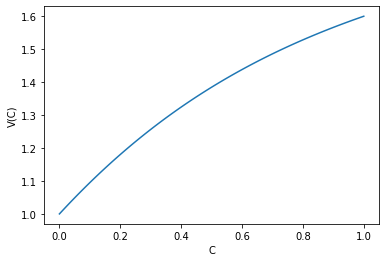

In [5]:
Ctest = np.linspace(0, Cbar, 100)
Vtest = equilibrium(Ctest)
V0 = Vtest[0]
VCbar = Vtest[-1]

fig, ax = plt.subplots()
ax.plot(Ctest, Vtest)
ax.set_xlabel('C')
ax.set_ylabel('V(C)')

In [6]:
xv, tv = np.meshgrid(x, t)
C = 0*xv

C[tv <= xv/VCbar] = Cbar

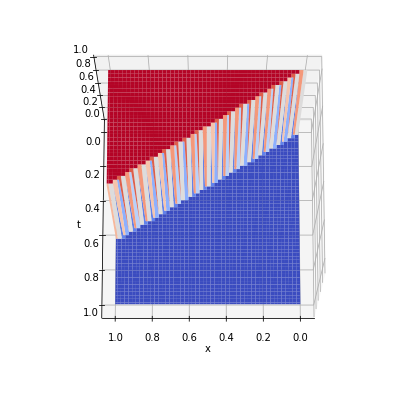

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, C, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=75, azim=-270)

In [17]:
ttest = tv[(tv > xv/VCbar) & (tv < x/V0)]
xtest = xv[(tv > xv/VCbar) & (tv < x/V0)]
Cinit = xtest*0 + 1.3

In [47]:
import scipy.optimize
def Vsolver(C):
    return equilibrium(C) - xtest/ttest

In [50]:
Cmiddle = scipy.optimize.newton_krylov(Vsolver, Cinit, f_tol=1e-14, maxiter=1000, verbose=False)

In [51]:
C[(tv > xv/VCbar) & (tv < x/V0)] = Cmiddle

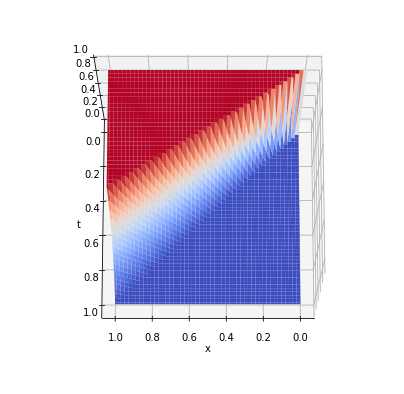

In [74]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, C, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=75, azim=-270)

In [59]:
from matplotlib import animation, rc
from IPython.display import HTML

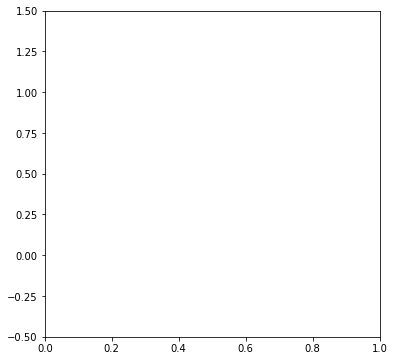

In [71]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim((0, 1))
ax.set_ylim((-0.5, 1.5))


line, = ax.plot([], [], lw=2)



def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    ui = C[i, :]
    line.set_data(t, ui)
    
    return (line,)

In [72]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=15, blit=True)

In [73]:
HTML(anim.to_html5_video())